In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup
import os
import wget
import zipfile

In [3]:
page_url = "https://s3.amazonaws.com/capitalbikeshare-data/"

In [4]:


def get_data_links(url, file_type = '.zip'):
    file_links = []
    soup = BeautifulSoup(requests.get(url).content,features='xml')
    for link in soup.find_all("Key"):
        filename = link.getText()
        if filename.endswith(file_type):
            file_links.append(url+filename)
    return file_links

def get_filename(url):
    return url.split('/')[-1][:-4]
        


In [5]:
get_filename('https://s3.amazonaws.com/capitalbikeshare-data/202204-capitalbikeshare-tripdata.zip')

'202204-capitalbikeshare-tripdata'

In [39]:
files = get_data_links(page_url)[-4:]
files

['https://s3.amazonaws.com/capitalbikeshare-data/202204-capitalbikeshare-tripdata.zip',
 'https://s3.amazonaws.com/capitalbikeshare-data/202205-capitalbikeshare-tripdata.zip',
 'https://s3.amazonaws.com/capitalbikeshare-data/202206-capitalbikeshare-tripdata.zip',
 'https://s3.amazonaws.com/capitalbikeshare-data/202207-capitalbikeshare-tripdata.zip']

In [49]:
def download_file_from_url(download_url,data_directory_path):
    if not os.path.exists(data_directory_path):
        os.makedirs(data_directory_path)
    print (data_directory_path) 
    filename = get_filename(download_url) + '.csv'
    if not os.path.exists(data_directory_path+filename):
        wget.download(download_url,out=data_directory_path)

def download_files_from_urls(page_url,data_directory_path,no_of_files = 'all'):
    file_links = get_data_links(page_url)
    if no_of_files == 'all':
        for file_link in file_links:
            download_file_from_url(file_link,data_directory_path)
    else:
        for file_link in file_links[-no_of_files:]:
            download_file_from_url(file_link,data_directory_path)

In [19]:
def extract_zip_to_csv_file(source_file_path,destination_path):
    with zipfile.ZipFile(source_file_path, 'r') as zip_ref:
        listOfFileNames = zip_ref.namelist()
        for fileName in listOfFileNames:
            if fileName.endswith('.csv'):
                zip_ref.extract(fileName,destination_path)

def extract_zip_to_csv_files(source_files_path,destination_path):
    """
    exracts all .csv file in a directory and remove the zip files
    """
    for item in os.listdir(source_files_path):
        if item.endswith('.zip'): 
            file_path = os.path.abspath(source_files_path+item)
            extract_zip_to_csv_file(file_path,destination_path)
            os.remove(file_path)
   



In [50]:
data_directory_path = "../raw_data/training_batch_files/2017-capitalbikeshare-tripdata.zip"
destination_directory_path = "../raw_data/training_batch_files/"

In [63]:
extract_zip_to_csv_files(destination_directory_path,destination_directory_path)

In [17]:
for item in os.listdir(destination_directory_path): # loop through items in dir
    if item.endswith('.zip'): # check for ".zip" extension
        file_name = os.path.abspath(destination_directory_path+item) # get full path of files
        # file_name = item
        print (file_name)
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(destination_directory_path) # extract file to dir
        zip_ref.close() # close file
        # os.remove(file_name) # delete zipped file

c:\Users\abhis\Desktop\MLProjects\Rental_Bike_Share_Prediction\raw_data\training_batch_files\2017-capitalbikeshare-tripdata.zip
c:\Users\abhis\Desktop\MLProjects\Rental_Bike_Share_Prediction\raw_data\training_batch_files\202206-capitalbikeshare-tripdata.zip
c:\Users\abhis\Desktop\MLProjects\Rental_Bike_Share_Prediction\raw_data\training_batch_files\202207-capitalbikeshare-tripdata.zip


In [62]:
download_files_from_urls(page_url,destination_directory_path,no_of_files=24)

../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/
../raw_data/training_batch_files/


In [27]:
os.makedirs("../raw/training_batch_files/") 

In [28]:
a = [1,2,3,4,5,6,5,7,8,9,9]

In [48]:
wget.download(files[1],destination_directory_path)

'../raw_data/training_batch_files//202205-capitalbikeshare-tripdata.zip'

In [56]:
df = pd.read_csv('../raw_data/training_batch_files/202204-capitalbikeshare-tripdata.csv')


In [58]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8F5ADBABCB4EBE01,classic_bike,2022-04-15 10:09:53,2022-04-15 10:16:12,Maine Ave & 9th St SW,31646.0,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,38.880440,-77.025236,38.888774,-77.028694,member
1,F502B0A7034DE321,classic_bike,2022-04-30 20:00:03,2022-05-01 14:27:41,Braddock Rd Metro North,31047.0,Braddock Rd Metro South,31969.0,38.814577,-77.052808,38.813474,-77.053734,casual
2,01BF0E3746A32678,classic_bike,2022-04-20 19:35:59,2022-04-20 19:41:04,11th & V st NW,31332.0,14th & Belmont St NW,31119.0,38.918199,-77.027171,38.921074,-77.031887,member
3,94BD7902E9889076,docked_bike,2022-04-15 17:23:21,2022-04-15 17:48:35,14th & D St NW / Ronald Reagan Building,31231.0,15th & W St NW,31125.0,38.894514,-77.031617,38.919019,-77.034449,casual
4,2CA1C29600E5F00A,classic_bike,2022-04-18 09:04:07,2022-04-18 09:05:12,11th & V st NW,31332.0,11th & V st NW,31332.0,38.918199,-77.027171,38.918199,-77.027171,member


In [61]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Hour has one extra column hr

In [46]:
day_df.drop(columns=["instant","atemp"], inplace=True)
hour_df.drop(columns=["instant","atemp"], inplace=True)

In [47]:
print ('null values for day :' , day_df.isna().sum())


null values for day : dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [28]:
print ('null values for hour :' , hour_df.isna().sum())

null values for hour : season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [29]:
day_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [30]:
day_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


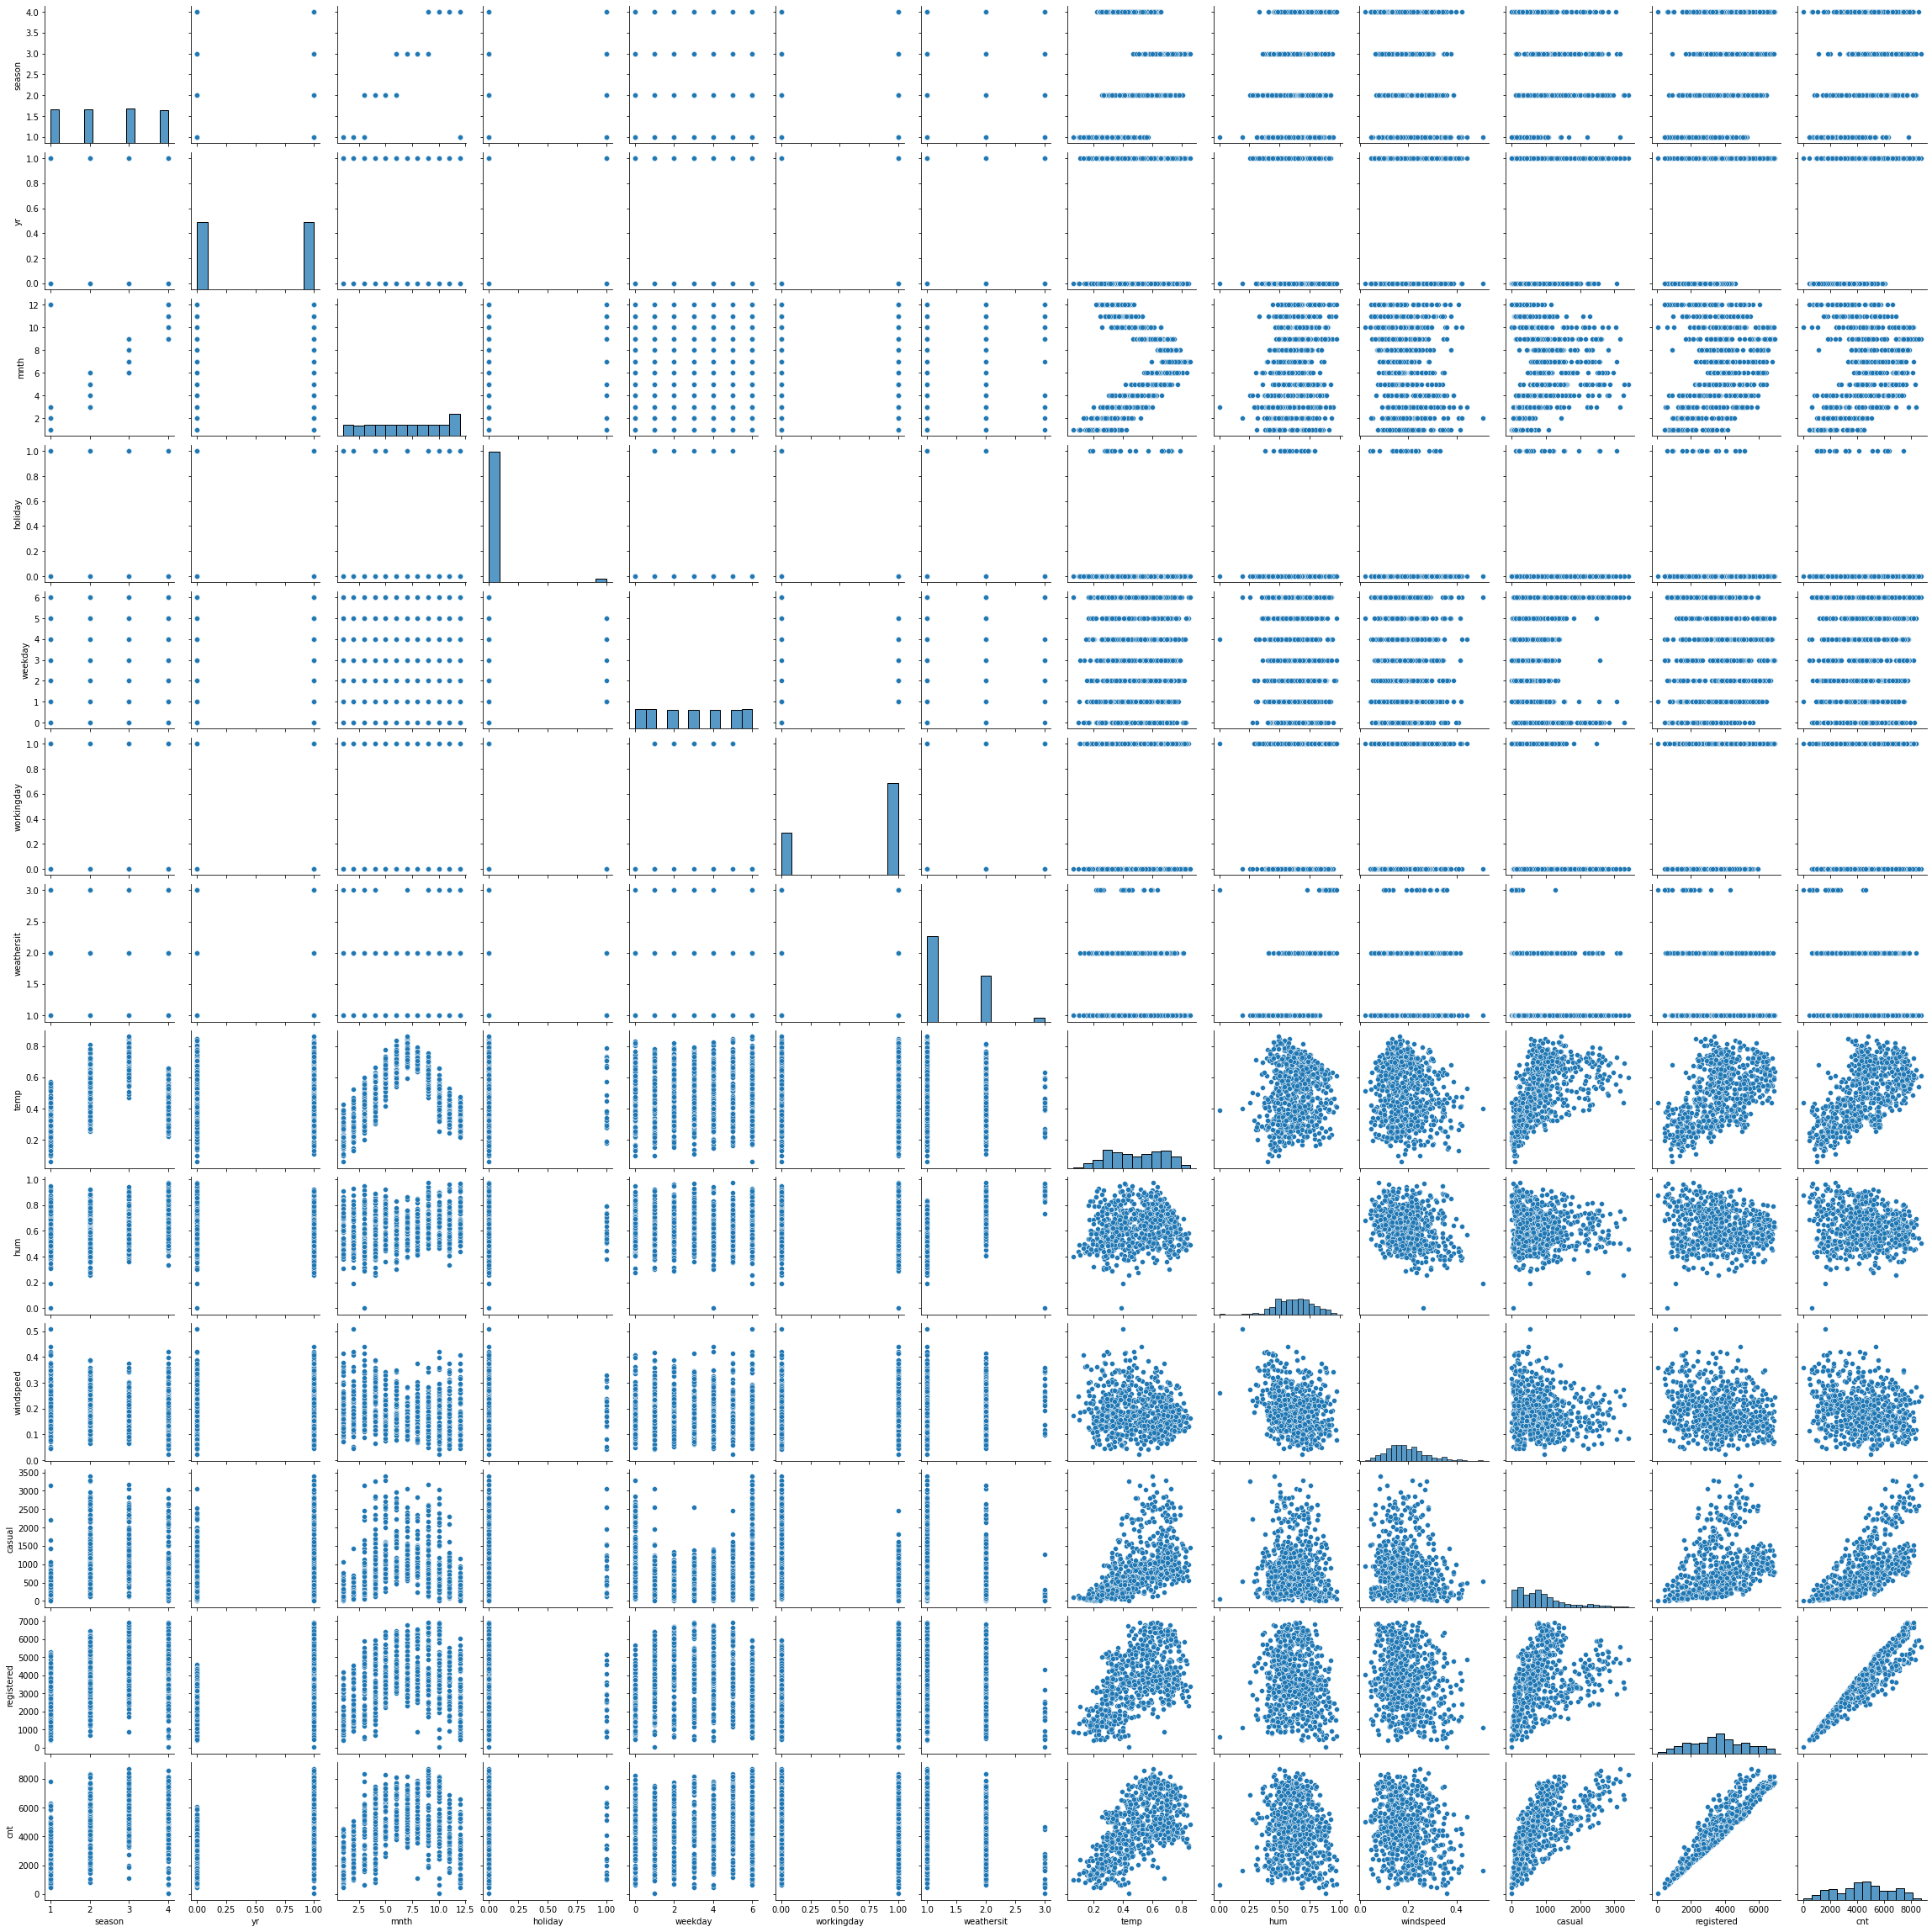

In [31]:
sns.pairplot(day_df);

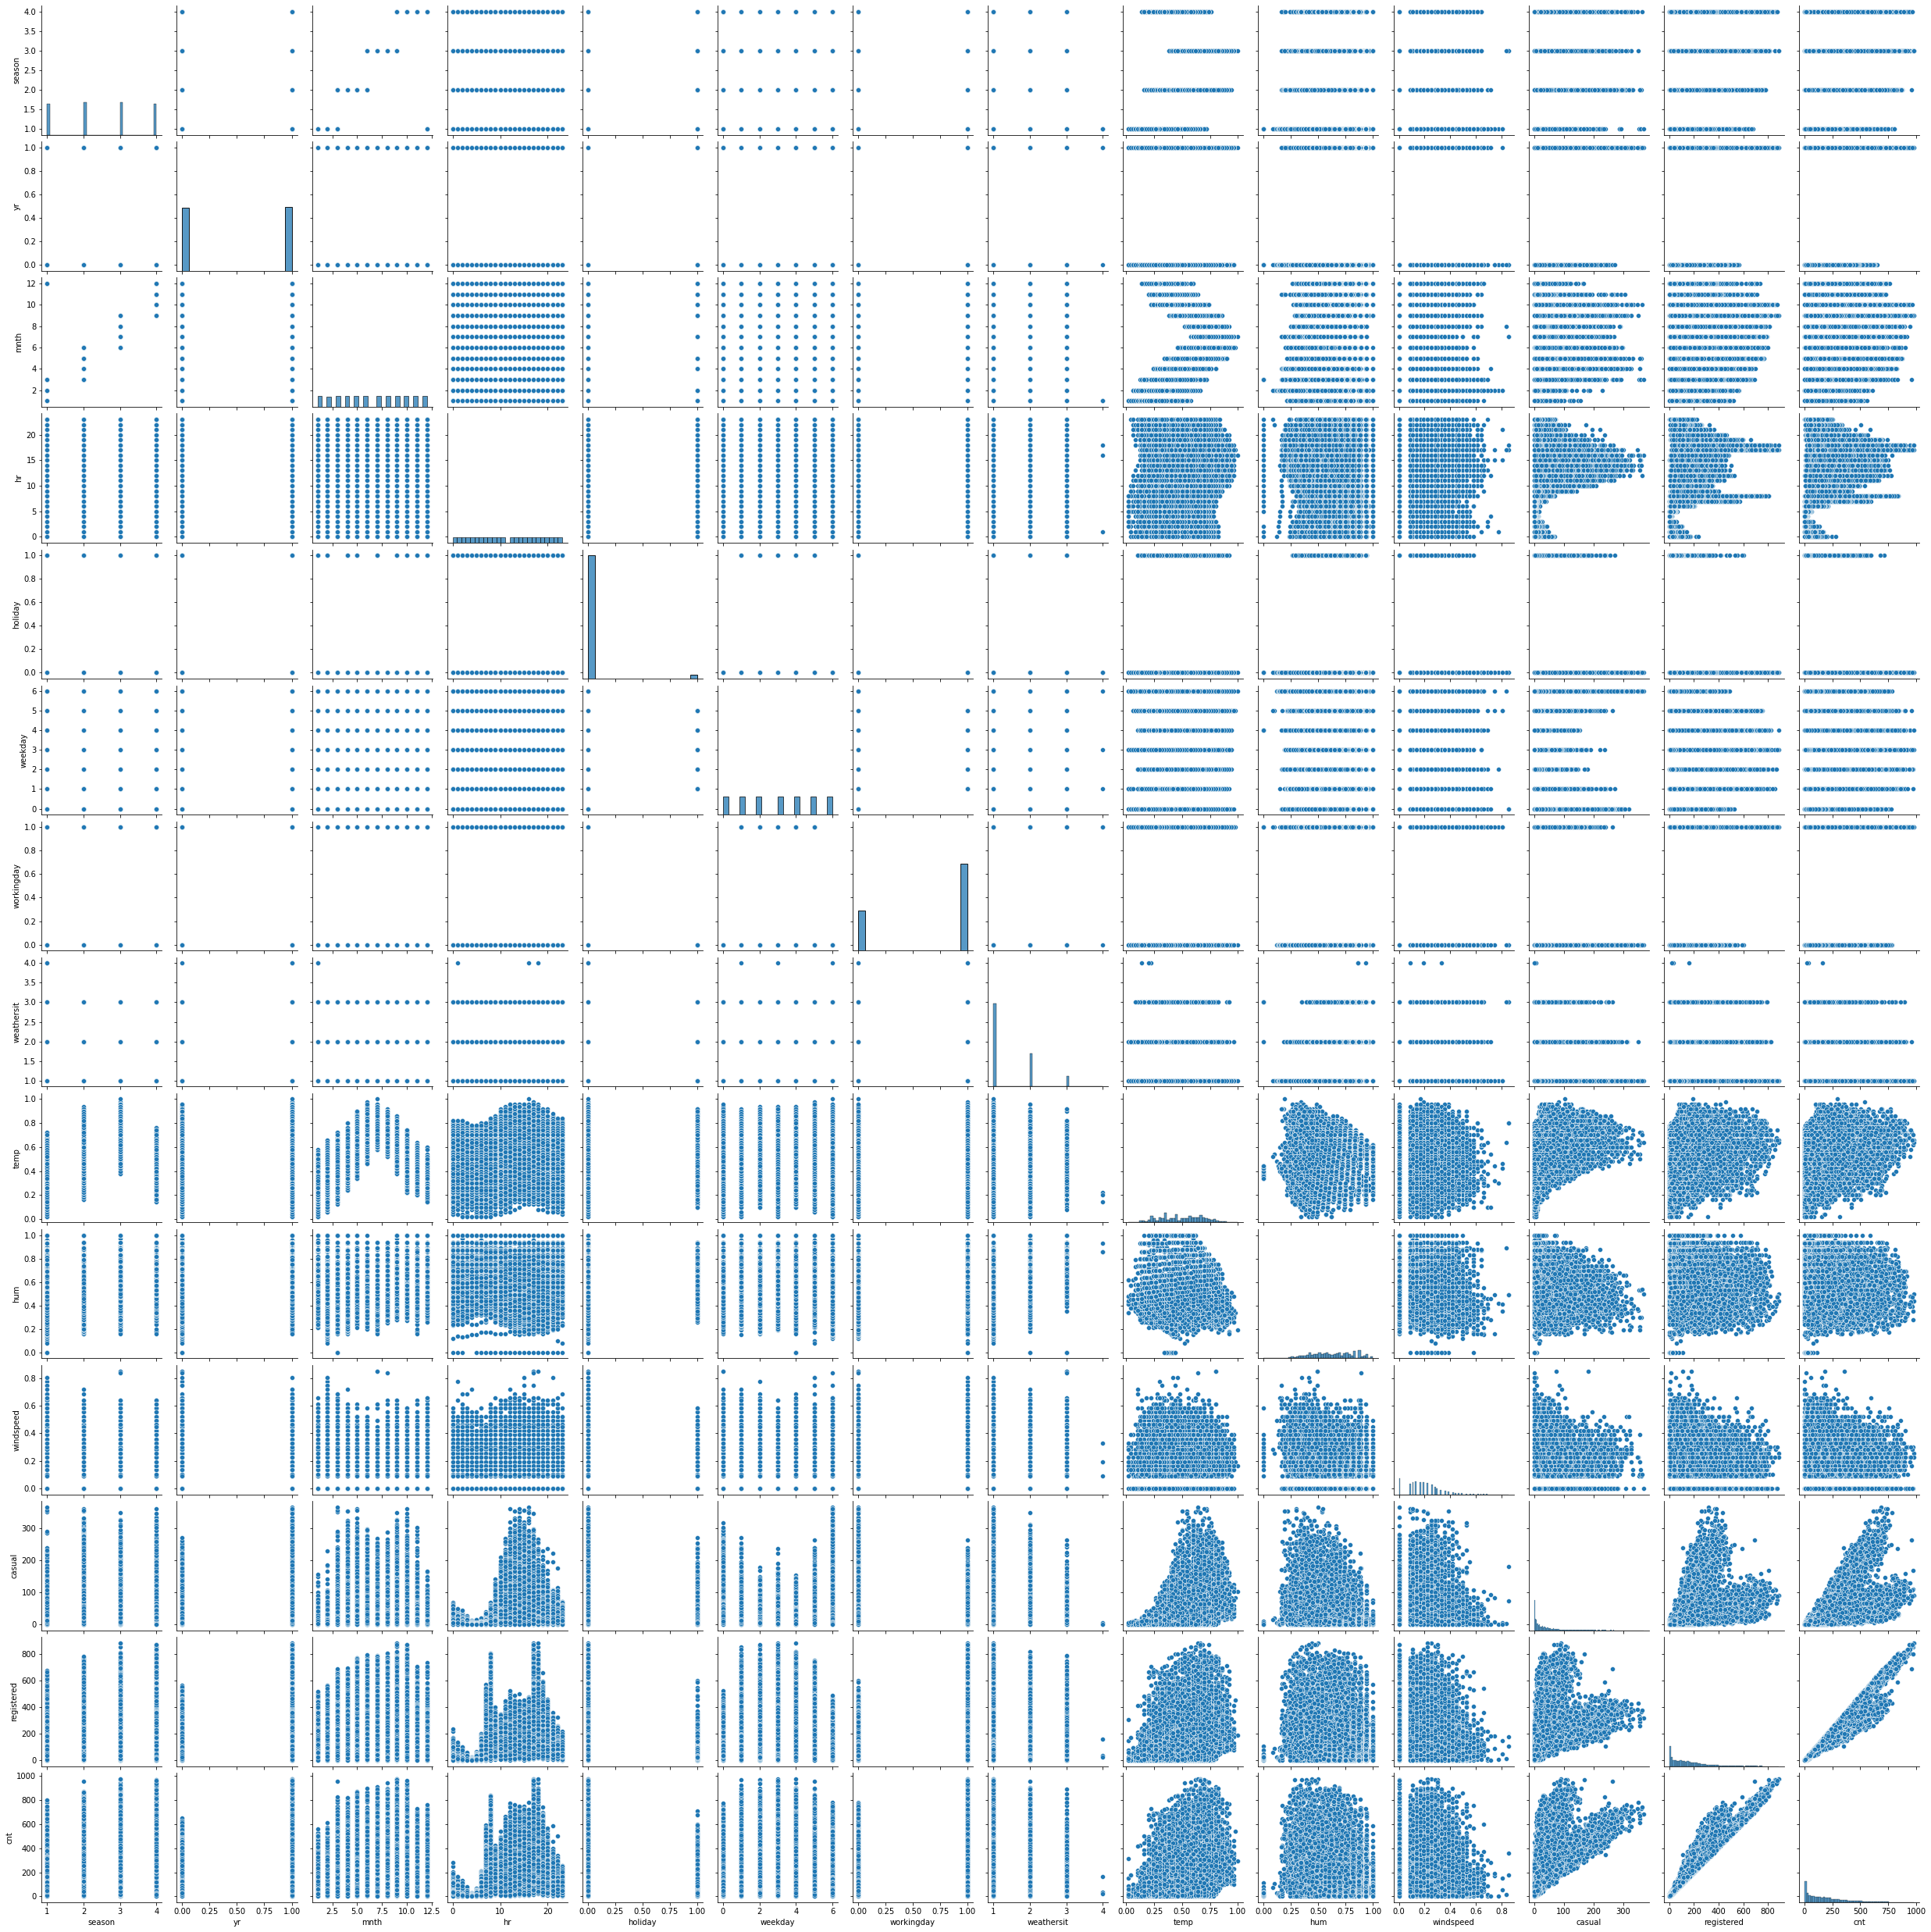

In [34]:
sns.pairplot(hour_df);

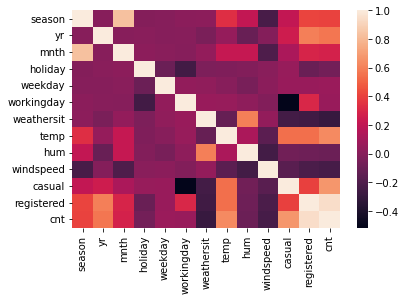

In [35]:
sns.heatmap(day_df.corr());

In [62]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holiday = cal.holidays(start='2011-01-01', end='2012-12-31').to_pydatetime()

In [64]:
holiday

array([datetime.datetime(2011, 1, 17, 0, 0),
       datetime.datetime(2011, 2, 21, 0, 0),
       datetime.datetime(2011, 5, 30, 0, 0),
       datetime.datetime(2011, 7, 4, 0, 0),
       datetime.datetime(2011, 9, 5, 0, 0),
       datetime.datetime(2011, 10, 10, 0, 0),
       datetime.datetime(2011, 11, 11, 0, 0),
       datetime.datetime(2011, 11, 24, 0, 0),
       datetime.datetime(2011, 12, 26, 0, 0),
       datetime.datetime(2012, 1, 2, 0, 0),
       datetime.datetime(2012, 1, 16, 0, 0),
       datetime.datetime(2012, 2, 20, 0, 0),
       datetime.datetime(2012, 5, 28, 0, 0),
       datetime.datetime(2012, 7, 4, 0, 0),
       datetime.datetime(2012, 9, 3, 0, 0),
       datetime.datetime(2012, 10, 8, 0, 0),
       datetime.datetime(2012, 11, 12, 0, 0),
       datetime.datetime(2012, 11, 22, 0, 0),
       datetime.datetime(2012, 12, 25, 0, 0)], dtype=object)

In [65]:
day_df['dteday'][day_df["holiday"] == 1]

16     2011-01-17
51     2011-02-21
104    2011-04-15
149    2011-05-30
184    2011-07-04
247    2011-09-05
282    2011-10-10
314    2011-11-11
327    2011-11-24
359    2011-12-26
366    2012-01-02
380    2012-01-16
415    2012-02-20
471    2012-04-16
513    2012-05-28
550    2012-07-04
611    2012-09-03
646    2012-10-08
681    2012-11-12
691    2012-11-22
724    2012-12-25
Name: dteday, dtype: object

In [98]:
import holidays
us_dc_holidays = holidays.country_holidays('US',years=[2011, 2012],expand=True,observed=True, subdiv='Virginia')
for holiday in us_dc_holidays.items():
    print(holiday)

NotImplementedError: Country US does not have subdivision 'Virginia'

In [71]:
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

summer


In [78]:
print(get_season(date(2011,12,26)))

winter


In [79]:
print(get_season(date(2011,3,20)))

winter


In [80]:
print(get_season(date(2011,3,21)))

spring


In [84]:
import requests
from bs4 import BeautifulSoup as soup 
from time import sleep

In [85]:
recent_df = pd.read_csv('./Bike-Sharing-Dataset/202207-capitalbikeshare-tripdata/202207-capitalbikeshare-tripdata.csv')

In [88]:
recent_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,023A22990112155D,classic_bike,2022-07-29 18:44:37,2022-07-29 18:57:09,Fairfax Dr & N Randolph St,31034.0,Clarendon Blvd & Pierce St,31016.0,38.882629,-77.109366,38.893438,-77.076389,member
1,AB7451BFA95ADC66,classic_bike,2022-07-22 18:18:54,2022-07-22 18:24:36,Fern St & Army Navy Dr,31936.0,Crystal City Metro / 18th St & S Bell St,31007.0,38.864838,-77.056873,38.857785,-77.051698,member
2,F3301E3CA0A6F6EA,classic_bike,2022-07-23 13:40:54,2022-07-23 13:41:03,2nd & G St NE,31639.0,2nd & G St NE,31639.0,38.899670,-77.003666,38.899670,-77.003666,member
3,245EBE5294DD9136,classic_bike,2022-07-05 16:24:30,2022-07-05 16:24:52,USDA / 12th & C St SW,31217.0,USDA / 12th & C St SW,31217.0,38.886277,-77.028242,38.886277,-77.028242,member
4,4CBA79FC841A54D0,classic_bike,2022-07-02 15:16:50,2022-07-02 16:36:47,Harvard St & Adams Mill Rd NW,31112.0,Harvard St & Adams Mill Rd NW,31112.0,38.927872,-77.043358,38.927872,-77.043358,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393678,2DB23364D09F2EFC,classic_bike,2022-07-19 18:45:14,2022-07-19 19:05:37,Van Ness Metro / UDC,31300.0,14th & Otis Pl NW,31131.0,38.944551,-77.063896,38.934405,-77.032687,casual
393679,C117D2072E4BF78D,classic_bike,2022-07-15 09:38:25,2022-07-15 09:49:20,13th & D St NE,31622.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.894832,-76.987633,38.884095,-76.995234,member
393680,4BB4E1BBDB329388,classic_bike,2022-07-03 19:32:50,2022-07-03 19:38:36,Lincoln Park / 13th & East Capitol St NE,31619.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.890461,-76.988355,38.884095,-76.995234,member
393681,ECD803A443AA4D6D,classic_bike,2022-07-22 21:27:16,2022-07-22 21:35:40,Lincoln Park / 13th & East Capitol St NE,31619.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.890461,-76.988355,38.884095,-76.995234,member


In [96]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

# Latitude & Longitude input
Latitude = str(recent_df['start_lat'][10])
Longitude = str(recent_df['start_lng'][10])

location = geolocator.reverse(Latitude+","+Longitude)
print(location)
address = location.raw['address']
print(address)


4th & M St SW, M Street Southwest, Southwest Waterfront, Washington, District of Columbia, 20024, United States
{'amenity': '4th & M St SW', 'road': 'M Street Southwest', 'neighbourhood': 'Southwest Waterfront', 'city': 'Washington', 'state': 'District of Columbia', 'ISO3166-2-lvl4': 'US-DC', 'postcode': '20024', 'country': 'United States', 'country_code': 'us'}


In [97]:
Latitude = str(recent_df['start_lat'][0])
Longitude = str(recent_df['start_lng'][0])

location = geolocator.reverse(Latitude+","+Longitude)
print(location)
address = location.raw['address']
print(address)

N Randolph St and Fairfax Dr, North Randolph Street, Ballston, Arlington, Arlington County, Virginia, 22201, United States
{'amenity': 'N Randolph St and Fairfax Dr', 'road': 'North Randolph Street', 'suburb': 'Ballston', 'city': 'Arlington', 'county': 'Arlington County', 'state': 'Virginia', 'ISO3166-2-lvl4': 'US-VA', 'postcode': '22201', 'country': 'United States', 'country_code': 'us'}


In [99]:
STATES_TUPLE = [("AL","Alabama"),("AK","Alaska"),("AZ","Arizona"),("AR","Arkansas"),("CA", "California"),("CO", "Colorado"),
("CT","Connecticut"),("DC","District of Columbia"),("DE","Delaware"),("FL","Florida"),("GA","Georgia"),
("HI","Hawaii"),("ID","Idaho"),("IL","Illinois"),("IN","Indiana"),("IA","Iowa"),("KS","Kansas"),("KY","Kentucky"),
("LA","Louisiana"),("ME","Maine"),("MD","Maryland"),("MA","Massachusetts"),("MI","Michigan"),("MN","Minnesota"),
("MS","Mississippi"),("MO","Missouri"),("MT","Montana"),("NE","Nebraska"),("NV","Nevada"),("NH","New Hampshire"),
("NJ","New Jersey"),("NM","New Mexico"),("NY","New York"),("NC","North Carolina"),("ND","North Dakota"),("OH","Ohio"),
("OK","Oklahoma"),("OR","Oregon"),("PA","Pennsylvania"),("RI","Rhode Island"),("SC","South Carolina"),("SD","South Dakota"),
("TN","Tennessee"),("TX","Texas"),("UT","Utah"),("VT","Vermont"),("VA","Virginia"),("WA","Washington"),("WV","West Virginia"),
("WI","Wisconsin"),("WY","Wyoming")]